<a id='top'></a>

# CSCI3022 F21
# Homework 5: Means, Variances, the CLT
***

**Name**: Samuel Boehle

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Mon 25 Oct**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
from scipy import integrate
import math
import random
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

## (15 pts) Problem 1: Simulation and Theory (Games)
***

The Riddler is a column on the website https://fivethirtyeight.com that posts logic, math, and probability puzzles each week.  Some of puzzles can be attacked by simulation and discrete probability: things that we have the tools to solve!

(https://fivethirtyeight.com/features/how-low-can-you-roll/)

You are given a fair, unweighted 10-sided die with sides labeled 0 to 9 and a sheet of paper to record your score. (If the very notion of a fair 10-sided die bothers you, and you need to know what sort of three-dimensional solid it is, then forget it — you have a random number generator that gives you an integer value from 0 to 9 with equal probability. Your loss — the die was a collector’s item.)

To start the game, you roll the die. Your current “score” is the number shown, divided by 10. For example, if you were to roll a 7, then your score would be 0.7. Then, you keep rolling the die over and over again. Each time you roll, if the digit shown by the die is less than or equal to the last digit of your score, then that roll becomes the new last digit of your score. Otherwise you just go ahead and roll again. The game ends when you roll a zero.

For example, suppose you roll the following: 6, 2, 5, 1, 8, 1, 0. After your first roll, your score would be 0.6, After the second, it’s 0.62. You ignore the third roll, since 5 is greater than the current last digit, 2. After the fourth roll, your score is 0.621. You ignore the fifth roll, since 8 is greater than the current last digit, 1. After the sixth roll, your score is 0.6211. And after the seventh roll, the game is over — 0.6211 is your final score.

What will be your average final score in this game?

**Part A**: Suppose our current value is $0.abcd$ for some 1-9 integers $a, b, c, d.$  What is the theoretical distribution of $e$, the next *term* in the final score's decimal representation?  Name the distribution and list all of its outcomes and their probabilities.  Note that "there are no additional terms" should have non-zero probability.

Binomial distribution with outcomes of the summatin of 1/9 times the previous outcome.

**Part B**: What is the expected number of *rolls* until you're done?  What is the theoretical variance in the number of *rolls* until you're done?  What distribution is this?



10 with variance of 4.5.

**Part C**: Simulate 10000 trials of this game, recording a score for each, then compute and print the average score over all of those trials. 

(Note: To check your result, you can find the exact *expected* solution in the following week's column: https://fivethirtyeight.com/features/can-you-decode-the-riddler-lottery/... but we want to simulate!)


In [6]:
def sim():
    done = False
    num = 0
    m = .1
    i= 1
    prev = 999999
    while done == False:
        if prev == 0:
            break

        ran = random.randint(0,9)
        if ran < prev:
            num = round(num + round((ran * m), i), i+1)
            i = i +1
            prev = ran
            m = round(m /10, i)
    
    return num

place = list(range(10000))

for i in range(0, 10000):
    place[i] = sim()

    
print("Average:", sum(place) / 10000)

Average: 0.46202334073099743


**Part D**: Make a histogram of all your scores from part C, and include a vertical line placed at the mean score from part C.

Text(0, 0.5, 'Occurances')

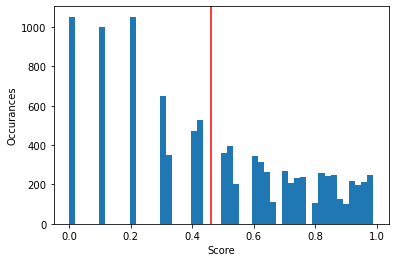

In [7]:
plt.hist(place, bins = 50)
plt.axvline(x=sum(place) / 10000, color = "red")

plt.xlabel("Score")
plt.ylabel("Occurances")

[Back to top](#top)
<a/ id='p2'></a>

## (15 pts) Problem 2: Normals and Making the Curve

Due to your excellent work to date, you've been hired as a Course Assistant to CSCI3022!  The new instructor isn't really in the mood to write new problems, so they've turned to you to create the exam and ensure that it has a reasonable distribution of grades.

For each of the prompts below, you should at the very least set up and justify your calculation by hand (in Markdown/Mathjax), before executing any calculations in Python. After that, feel free to use python to actually do the calculations and get decimal results. You should use absolutely use Python to retrieve critical values of a standard normal random variable (using a Z chart is so old school!).


**Part A**:
Suppose that you've created an exam with a mean of 75 points and a standard deviation of 15 points.  These scores are normally distributed  Thanks to including some extra credit, note that there's some possibility of scores above 100... which is fine, because those students are (fire emoji).


The administration has told you that they'd like to track your "B/C" students, and wants data regarding any student whose exam grade fell between 78 and 84.  What is the probability that an individual students' (say, the $i$th) grade $X_i$ falls between 78 and 84?



$$P(\frac{78-75}{15} < \frac{x-75}{15} < \frac{84-75}{15}) = P(\frac{3}{15} < Z < \frac{9}{15})= \Phi(\frac{9}{15}) - \Phi(\frac{3}{15})$$

In [8]:
print("Probability:", stats.norm.cdf(9/15) -stats.norm.cdf(3/15))

Probability: 0.14648717281082346


**Part B:** Suppose your class has 30 students.  What is the probability that the overall average for the exam $\bar{X}$ falls between 78 and 84?



$$P(\frac{78-75}{15/\sqrt{30}} < Z < \frac{84-75}{15/\sqrt{30}}) = \Phi(\frac{9}{15/\sqrt{30}}) - \Phi(\frac{3}{15/\sqrt{30}})$$

In [10]:
print("Probabiltiy:", stats.norm.cdf(9/(15/math.sqrt(30))) -  stats.norm.cdf(3/(15/math.sqrt(30))))

Probabiltiy: 0.1361533386725925


**Part C**:
Suppose you had control over enrollment, and could choose the number of students $n$ in your class.  What value would you choose for $n$ to **maximize** the probability that the overall average for the exam $\bar{X}$ falls between 78 and 84?

Hint: you can brute force it using a similar calculation to that in **B**!

In [11]:
results = list(range(46))

x=0
max = 0

for i in range(1,100):
    cur = stats.norm.cdf(9/(15/math.sqrt(i))) -  stats.norm.cdf(3/(15/math.sqrt(i)))
    if cur > max:
        x = i
        max = cur
        
print("Number of students to maxmize probability:", x, " With average of:", max)

Number of students to maxmize probability: 7  With average of: 0.24214531603699618


**Part D:**  You've realized that no matter what you do, the standard deviation for exam scores basically never deviates from 15 points.  But you can affect the mean by writing slightly easier/tougher problems or providing better hints along the way!  For another class of 30 students, what value would you have to change the exam average $\mu$ to be to ensure that there is a 97% chance that the *class average* score is above 78?

In [17]:
print(1- stats.norm.cdf((78 - 83.16)/(15/math.sqrt(30))))

0.9702287103140732


Through brute force, looks like there has to be an exam average of around 83.16

[Back to top](#top)
<a/ id='p3'></a>

## (15 pts) Problem 3: Simulation of Definite Integrals
One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a relatively simple integral. 

**Part A.** Consider the following function.

$$ f(x) = \frac{1}{4} \ \sin(x) $$   

Compute **by hand**, the integral of $f(x)$ for $0 \leq x \leq 2$. Once you have your expression worked out, you may use python to estimate the integral to the nearest 6th decimal place.  

**Solution:**

$$\int_{0}^{2}\frac{1}{4}\sin(x) = \frac{1}{4} \left[-\cos{x}\right]_0^2 = \frac{1}{4}(-\cos(2) + 1)$$

In [13]:
sin = lambda x: (1/4)*math.sin(x)

integrate.quad(sin, 0, 2)

(0.3540367091367856, 3.930597060461789e-15)

**Part B.** Suppose we sample a random variable $X$ from $U(0,2)$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,2] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

**Solution:**
This estimates how much of the area the curve $f(x)$ takes up in the box.

**Part C.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

**Solution:**

Take that box and have a bunch of randoms points in the box. For each point test to see if the y value is less than the function and tally those points. Get the ratio of the points of under the curve, and then multply that ratio by the area of the box to get the integral.

**Part D.** Complete the function `integrate` below to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $\pi$, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,1)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

In [14]:
#Part D solution here
import random

def f(x):
    return (np.sin(x))/4

def integrate(num_samples, ub, isPlot):
    
    in_area = 0
    
    colors = list(range(num_samples))
    
    x_l= list(range(num_samples))
    y_l= list(range(num_samples))
    z = list(range(num_samples))
    for i in range(0, num_samples):
        x_l[i] = random.random() * 2
        y_l[i] = random.random()
        if f(x_l[i]) > y_l[i]:
            colors[i] = "orange"
            in_area = in_area + 1
            z[i] = 1
        else:
            colors[i] = "blue"
            z[i] = 0
        
    result = ub*(in_area / num_samples)
    variance = np.var(z)
    
    if isPlot == True:
        x = np.arange(0, 2, .1)
        plt.plot(x, f(x))
        plt.scatter(x_l, y_l, c= colors)
    
    return result, variance

**Part E.** Write your own small unit tests!

First, what should your `integrate` function output if you plug in `ub=0`? Set that as `int_0_to_0` below.

Second, what should your `integrate` function output if you plug in `ub=pi`? Set that as `int_0_to_pi` below.

Then, you can execute the cell below to run two sanity checks. Write out **in math** (like, a definite integral) what each of these two tests is checking and **why** that is a reasonable sanity check.

If these two assertions run without fail, then things seem to be working okay. Note that the upper endpoint test is stochastic, so if it fails, try running it a few times. If it fails a lot, then things are probably going wrong.

In [15]:
# Part E solution here
answer1 = integrate(1000, 0 , False)
print(answer1[0])
answer2 = integrate(10000, np.pi, False)
print(answer2[0])

0.0
0.561402607196496


Function should output 0 for an upper bound of 0. And .5 for an upper bound of pi.

$$\int_{0}^{\pi}\frac{1}{4}\sin(x) = \frac{1}{4} \left[-\cos{x}\right]_0^\pi = \frac{1}{4}(-1 - 1) = \frac{1}{2}$$

**Part F.** Run your simulation with `isPlot=True` and `ub=2` for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral. Be sure to leave your cells evaluated for the graders! Does your estimate agree with the exact value of the integral you computed in **Part A**? 

Result of integral with 100000 steps: 0.35874 Variance: 0.14719640309999998
It agrees with the exact value.


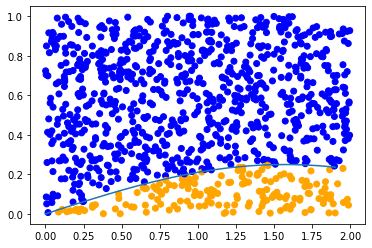

In [16]:
# Part F solution here

answer3 = integrate(1000, 2, True)

answer4 = integrate(100000, 2, False)
print("Result of integral with 100000 steps:", answer4[0], "Variance:", answer4[1])
print("It agrees with the exact value.")